In [ ]:
#Run if not downloaded already
import sys
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install scikit-learn
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install seaborn

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

from functools import partial, reduce 

#Load all the data into seperate data frames

# GDP data
gdp_df = pd.read_csv("../Clean_Data/clean_gdp_capita.csv", encoding="ISO-8859-1", index_col=0)
a = gdp_df.columns[3:]
gdp_df = pd.melt(gdp_df, id_vars=['Country.Name', 'Region', 'IncomeGroup'], value_vars=a,
        var_name='Year', value_name='GDP').sort_values(['Country.Name','Year']).reset_index()
gdp_df.drop('index', inplace=True, axis=1)
gdp_df.head()


,Country.Name,Region,IncomeGroup,Year,GDP
0,Afghanistan,South Asia,Low income,1960,59.773194
1,Afghanistan,South Asia,Low income,1961,59.860874
2,Afghanistan,South Asia,Low income,1962,58.458015
3,Afghanistan,South Asia,Low income,1963,78.706388
4,Afghanistan,South Asia,Low income,1964,82.095231


In [2]:
# GINI_Index
gini_df = pd.read_csv("../Clean_Data/clean_gini_index.csv", encoding="ISO-8859-1", index_col=0)
a = gini_df.columns[3:]
gini_df = pd.melt(gini_df, id_vars=['Country.Name', 'Region', 'IncomeGroup'], value_vars=a,
        var_name='Year', value_name='Gini Index').sort_values(['Country.Name','Year']).reset_index()
gini_df.drop('index', inplace=True, axis=1)
gini_df.head()

,Country.Name,Region,IncomeGroup,Year,Gini Index
0,Afghanistan,South Asia,Low income,1960,NaN
1,Afghanistan,South Asia,Low income,1961,NaN
2,Afghanistan,South Asia,Low income,1962,NaN
3,Afghanistan,South Asia,Low income,1963,NaN
4,Afghanistan,South Asia,Low income,1964,NaN


In [3]:
# Literacy Rate
literacy_df = pd.read_csv("../Clean_Data/clean_literacy_rate.csv", encoding="ISO-8859-1", index_col=0)
a = literacy_df.columns[3:]
literacy_df = pd.melt(literacy_df, id_vars=['Country.Name', 'Region', 'IncomeGroup'], value_vars=a,
        var_name='Year', value_name='Literacy Rate').sort_values(['Country.Name','Year']).reset_index()
literacy_df.drop('index', inplace=True, axis=1)
literacy_df.head()

,Country.Name,Region,IncomeGroup,Year,Literacy Rate
0,Afghanistan,South Asia,Low income,1960,18.157681
1,Afghanistan,South Asia,Low income,1961,18.157681
2,Afghanistan,South Asia,Low income,1962,18.157681
3,Afghanistan,South Asia,Low income,1963,18.157681
4,Afghanistan,South Asia,Low income,1964,18.157681


In [4]:
# Secondary School Enrollment 
second_school_df = pd.read_csv("../Clean_Data/clean_school_enrol_sec.csv", encoding="ISO-8859-1", index_col=0)
a = second_school_df.columns[3:]
second_school_df = pd.melt(second_school_df, id_vars=['Country.Name', 'Region', 'IncomeGroup'], value_vars=a,
        var_name='Year', value_name='Secondary School Enrollment').sort_values(['Country.Name','Year']).reset_index()
second_school_df.drop('index', inplace=True, axis=1)
second_school_df.head()

,Country.Name,Region,IncomeGroup,Year,Secondary School Enrollment
0,Afghanistan,South Asia,Low income,1960,8.30642
1,Afghanistan,South Asia,Low income,1961,8.30642
2,Afghanistan,South Asia,Low income,1962,8.30642
3,Afghanistan,South Asia,Low income,1963,8.30642
4,Afghanistan,South Asia,Low income,1964,8.30642


In [5]:
# Tertiary School Enrollment 
third_school_df = pd.read_csv("../Clean_Data/clean_school_enrol_tert.csv", encoding="ISO-8859-1", index_col=0)
a = third_school_df.columns[3:]
third_school_df = pd.melt(third_school_df, id_vars=['Country.Name', 'Region', 'IncomeGroup'], value_vars=a,
        var_name='Year', value_name='Tertinary School Enrollment').sort_values(['Country.Name','Year']).reset_index()
third_school_df.drop('index', inplace=True, axis=1)
third_school_df.head()

,Country.Name,Region,IncomeGroup,Year,Tertinary School Enrollment
0,Afghanistan,South Asia,Low income,1960,0.76877
1,Afghanistan,South Asia,Low income,1961,0.76877
2,Afghanistan,South Asia,Low income,1962,0.76877
3,Afghanistan,South Asia,Low income,1963,0.76877
4,Afghanistan,South Asia,Low income,1964,0.76877


In [6]:
# Poverty Head
poverty_df = pd.read_csv("../Clean_Data/clean_poverty_head.csv", encoding="ISO-8859-1", index_col=0)
a = poverty_df.columns[3:]
poverty_df = pd.melt(poverty_df, id_vars=['Country.Name', 'Region', 'IncomeGroup'], value_vars=a,
        var_name='Year', value_name='Poverty Rate').sort_values(['Country.Name','Year']).reset_index()
poverty_df.drop('index', inplace=True, axis=1)

In [7]:
# Merge dataframes
dfs = [gdp_df, gini_df, literacy_df, second_school_df, third_school_df, poverty_df]
final_df = reduce(lambda x,y: pd.merge(x,y, on=['Country.Name', 'Region', 'IncomeGroup', 'Year'], how='outer'), dfs)
# Only use the results for actual data
final_df.dropna(subset=['Poverty Rate','GDP','Gini Index', 'Literacy Rate', 'Secondary School Enrollment'
                        ,'Tertinary School Enrollment'], inplace=True)
final_df.index.name = 'Index'
final_df

,Country.Name,Region,IncomeGroup,Year,GDP,Gini Index,Literacy Rate,Secondary School Enrollment,Tertinary School Enrollment,Poverty Rate
Index,,,,,,,,,,
61,Albania,Europe & Central Asia,Upper middle income,1960,639.484736,27.000000,98.712982,84.974258,13.90814,0.900000
62,Albania,Europe & Central Asia,Upper middle income,1961,639.484736,27.000000,98.712982,84.974258,13.90814,0.900000
63,Albania,Europe & Central Asia,Upper middle income,1962,639.484736,27.000000,98.712982,84.974258,13.90814,0.900000
64,Albania,Europe & Central Asia,Upper middle income,1963,639.484736,27.000000,98.712982,84.974258,13.90814,0.900000
65,Albania,Europe & Central Asia,Upper middle income,1964,639.484736,27.000000,98.712982,84.974258,13.90814,0.900000
...,...,...,...,...,...,...,...,...,...,...
16038,Zimbabwe,Sub-Saharan Africa,Lower middle income,2016,1464.583529,44.116667,88.693420,52.405670,10.00655,31.816667
16039,Zimbabwe,Sub-Saharan Africa,Lower middle income,2017,1548.170056,44.300000,88.693420,52.405670,10.00655,33.900000
16040,Zimbabwe,Sub-Saharan Africa,Lower middle income,2018,1683.740577,44.300000,88.693420,52.405670,10.00655,33.900000


In [8]:
# Create label for our result and seperate into train and test
# for maching learning if we want to create more models
y = final_df['Poverty Rate']
X = final_df
X_gdp = X["GDP"]
X_gini = X["Gini Index"]
X_lit = X["Literacy Rate"]
X_sec = X["Secondary School Enrollment"] 
X_ter = X["Tertinary School Enrollment"]

model = LinearRegression()

Coefficients: 
 [[-0.00236839]]
Mean squared error: 582.82
Coefficient of determination: 0.16


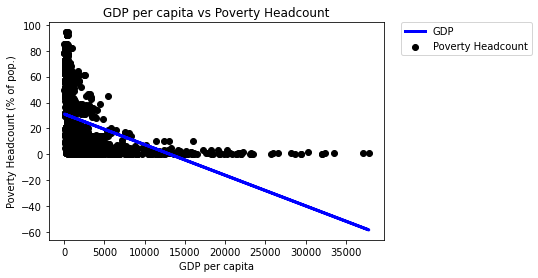

In [9]:
#gdp
X_train, X_test, y_train, y_test = train_test_split(X_gdp,y, train_size = .75, test_size = 0.25 , random_state = 0)

X_train = X_train.values
X_train = np.reshape(X_train, (-1,1))
X_test = X_test.values
X_test = np.reshape(X_test, (-1,1))
y_train = y_train.values
y_train = np.reshape(y_train, (-1,1))
y_test = y_test.values
y_test = np.reshape(y_test, (-1,1))
model.fit(X_train,y_train)

# Make predictions using the testing set
gdp_y_pred = model.predict(X_test)

# The coefficients
print('Coefficients: \n', model.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, gdp_y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, gdp_y_pred))

# Plot outputs
plt.scatter(X_test, y_test,  color='black', label='Poverty Headcount')
plt.plot(X_test, gdp_y_pred, color='blue', linewidth=3, label='GDP')

plt.title('GDP per capita vs Poverty Headcount')
plt.xlabel('GDP per capita')
plt.ylabel('Poverty Headcount (% of pop.)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()


Coefficients: 
 [[0.84326039]]
Mean squared error: 640.45
Coefficient of determination: 0.07


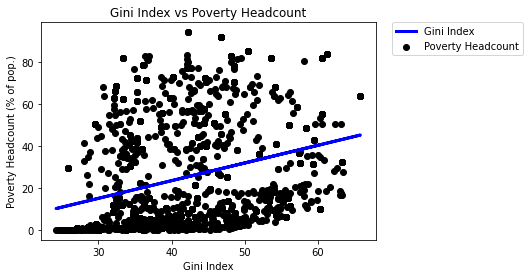

In [10]:
#gini
X_train, X_test, y_train, y_test = train_test_split(X_gini,y, train_size = .75, test_size = 0.25 , random_state = 0)

X_train = X_train.values
X_train = np.reshape(X_train, (-1,1))
X_test = X_test.values
X_test = np.reshape(X_test, (-1,1))
y_train = y_train.values
y_train = np.reshape(y_train, (-1,1))
y_test = y_test.values
y_test = np.reshape(y_test, (-1,1))
model.fit(X_train,y_train)

# Make predictions using the testing set
gini_y_pred = model.predict(X_test)

# The coefficients
print('Coefficients: \n', model.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, gini_y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, gini_y_pred))

# Plot outputs
plt.scatter(X_test, y_test,  color='black', label='Poverty Headcount')
plt.plot(X_test, gini_y_pred, color='blue', linewidth=3, label='Gini Index')

plt.title('Gini Index vs Poverty Headcount')
plt.xlabel('Gini Index')
plt.ylabel('Poverty Headcount (% of pop.)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()


Coefficients: 
 [[-0.77228222]]
Mean squared error: 334.43
Coefficient of determination: 0.52


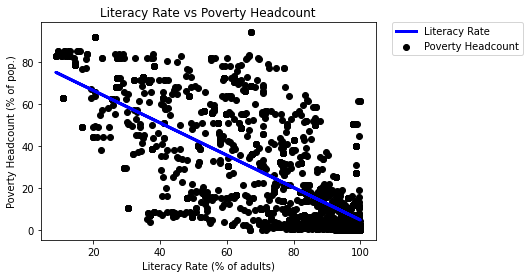

In [11]:
#Lit
X_train, X_test, y_train, y_test = train_test_split(X_lit,y, train_size = .75, test_size = 0.25 , random_state = 0)

X_train = X_train.values
X_train = np.reshape(X_train, (-1,1))
X_test = X_test.values
X_test = np.reshape(X_test, (-1,1))
y_train = y_train.values
y_train = np.reshape(y_train, (-1,1))
y_test = y_test.values
y_test = np.reshape(y_test, (-1,1))
model.fit(X_train,y_train)

# Make predictions using the testing set
lit_y_pred = model.predict(X_test)

# The coefficients
print('Coefficients: \n', model.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, lit_y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, lit_y_pred))

# Plot outputs
plt.scatter(X_test, y_test,  color='black', label='Poverty Headcount')
plt.plot(X_test, lit_y_pred, color='blue', linewidth=3, label='Literacy Rate')

plt.title('Literacy Rate vs Poverty Headcount')
plt.xlabel('Literacy Rate (% of adults)')
plt.ylabel('Poverty Headcount (% of pop.)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.show()

Coefficients: 
 [[-0.54775701]]
Mean squared error: 368.38
Coefficient of determination: 0.47


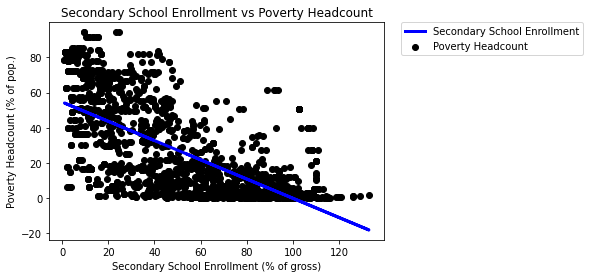

In [12]:
#Secondary School Data
X_train, X_test, y_train, y_test = train_test_split(X_sec,y, train_size = .75, test_size = 0.25 , random_state = 0)

X_train = X_train.values
X_train = np.reshape(X_train, (-1,1))
X_test = X_test.values
X_test = np.reshape(X_test, (-1,1))
y_train = y_train.values
y_train = np.reshape(y_train, (-1,1))
y_test = y_test.values
y_test = np.reshape(y_test, (-1,1))
model.fit(X_train,y_train)

# Make predictions using the testing set
sec_y_pred = model.predict(X_test)

# The coefficients
print('Coefficients: \n', model.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, sec_y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, sec_y_pred))

# Plot outputs
plt.scatter(X_test, y_test,  color='black', label='Poverty Headcount')
plt.plot(X_test, sec_y_pred, color='blue', linewidth=3, label='Secondary School Enrollment')
plt.title('Secondary School Enrollment vs Poverty Headcount')
plt.xlabel('Secondary School Enrollment (% of gross)')
plt.ylabel('Poverty Headcount (% of pop.)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

Coefficients: 
 [[-0.72239746]]
Mean squared error: 498.26
Coefficient of determination: 0.28


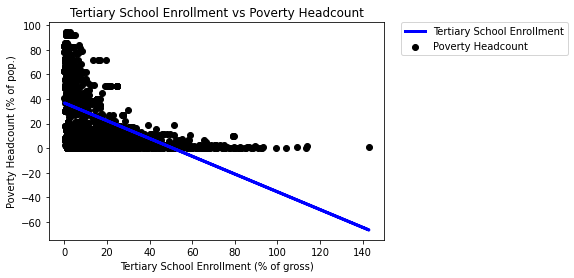

In [13]:
#Tertiary School Data
X_train, X_test, y_train, y_test = train_test_split(X_ter,y, train_size = .75, test_size = 0.25 , random_state = 0)

X_train = X_train.values
X_train = np.reshape(X_train, (-1,1))
X_test = X_test.values
X_test = np.reshape(X_test, (-1,1))
y_train = y_train.values
y_train = np.reshape(y_train, (-1,1))
y_test = y_test.values
y_test = np.reshape(y_test, (-1,1))
model.fit(X_train,y_train)

# Make predictions using the testing set
ter_y_pred = model.predict(X_test)

# The coefficients
print('Coefficients: \n', model.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, ter_y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, ter_y_pred))

# Plot outputs
plt.scatter(X_test, y_test,  color='black', label='Poverty Headcount')
plt.plot(X_test, ter_y_pred, color='blue', linewidth=3, label='Tertiary School Enrollment')

plt.title('Tertiary School Enrollment vs Poverty Headcount')
plt.xlabel('Tertiary School Enrollment (% of gross)')
plt.ylabel('Poverty Headcount (% of pop.)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.show()